In [18]:
import io
import numpy as np
import PIL
import torch
import openpifpaf
import matplotlib.pyplot
from timeit import timeit
from time import time

### Checks versions

In [11]:
print('OpenPifPaf version', openpifpaf.__version__)
print('PyTorch version', torch.__version__)

OpenPifPaf version 0.13.11
PyTorch version 1.13.1


In [12]:
torch.cuda.is_available()

True

In [13]:
torch.cuda.device_count()

1

# Images

### Gets an image and converts it to PIL image then numpy array

In [14]:
IMG_PATH = "Images/"
pil_im = PIL.Image.open((IMG_PATH+"shrek.JPG")).convert('RGB')
im = np.asarray(pil_im)

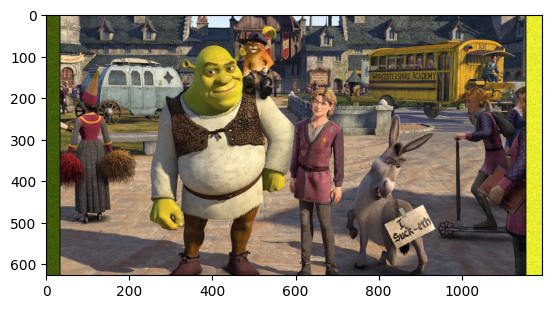

In [15]:
plt.imshow(im)

### Predicts

In [29]:
predictor = openpifpaf.Predictor(checkpoint='mobilenetv3large') #could use mobilenetv3small for betterperformances
predictions, gt_anns, image_meta = predictor.pil_image(pil_im)

Downloading: "http://github.com/openpifpaf/torchhub/releases/download/v0.13/mobilenetv3large-210820-184901-cocokp-slurm725985-edge513-o10s-6c76cbfb.pkl" to /home/guillaume/.cache/torch/hub/checkpoints/mobilenetv3large-210820-184901-cocokp-slurm725985-edge513-o10s-6c76cbfb.pkl
100.0%


AttributeError: Can't get attribute 'ConvBNActivation' on <module 'torchvision.models.mobilenetv2' from '/home/guillaume/anaconda3/envs/semproj/lib/python3.9/site-packages/torchvision/models/mobilenetv2.py'>

In [24]:
start = time()
predictions, _, _ = predictor.pil_image(pil_im)
stop = time()
duration = stop-start
print(f"duration = {duration:.2f}s")


duration = 0.16s


### We use MS coco skeleton with the following kypoints indexing

In [17]:
keypoints = [ "nose", "left_eye", "right_eye", "left_ear", "right_ear", "left_shoulder", "right_shoulder", "left_elbow", "right_elbow", "left_wrist", "right_wrist", "left_hip", "right_hip", "left_knee", "right_knee", "left_ankle", "right_ankle" ]

![Coordinates](openpifpaf_coordinates.png)

In [15]:
predictions[0].data # for person of index 0, each keypoint x, y ,confidence

array([[655.5931    , 222.15228   ,   0.9746474 ],
       [667.7661    , 215.12592   ,   0.99894506],
       [650.38257   , 210.98392   ,   0.97503513],
       [685.0627    , 222.49873   ,   0.98906904],
       [639.8342    , 213.79205   ,   0.91740876],
       [697.30023   , 282.3052    ,   0.9853889 ],
       [611.48175   , 270.1398    ,   0.976607  ],
       [705.0056    , 350.91382   ,   0.97389317],
       [599.72455   , 337.7863    ,   0.96926343],
       [703.59656   , 414.11462   ,   0.9751259 ],
       [594.5018    , 393.66525   ,   0.9402814 ],
       [663.85565   , 397.44363   ,   0.977862  ],
       [616.9104    , 391.18402   ,   0.9739861 ],
       [673.4544    , 501.95343   ,   0.978421  ],
       [625.0128    , 498.87268   ,   0.9501031 ],
       [683.3032    , 602.4662    ,   0.96723205],
       [626.5491    , 601.7794    ,   0.9443159 ]], dtype=float32)

In [6]:
openpifpaf.show.Canvas.show = True
openpifpaf.show.Canvas.image_min_dpi = 100

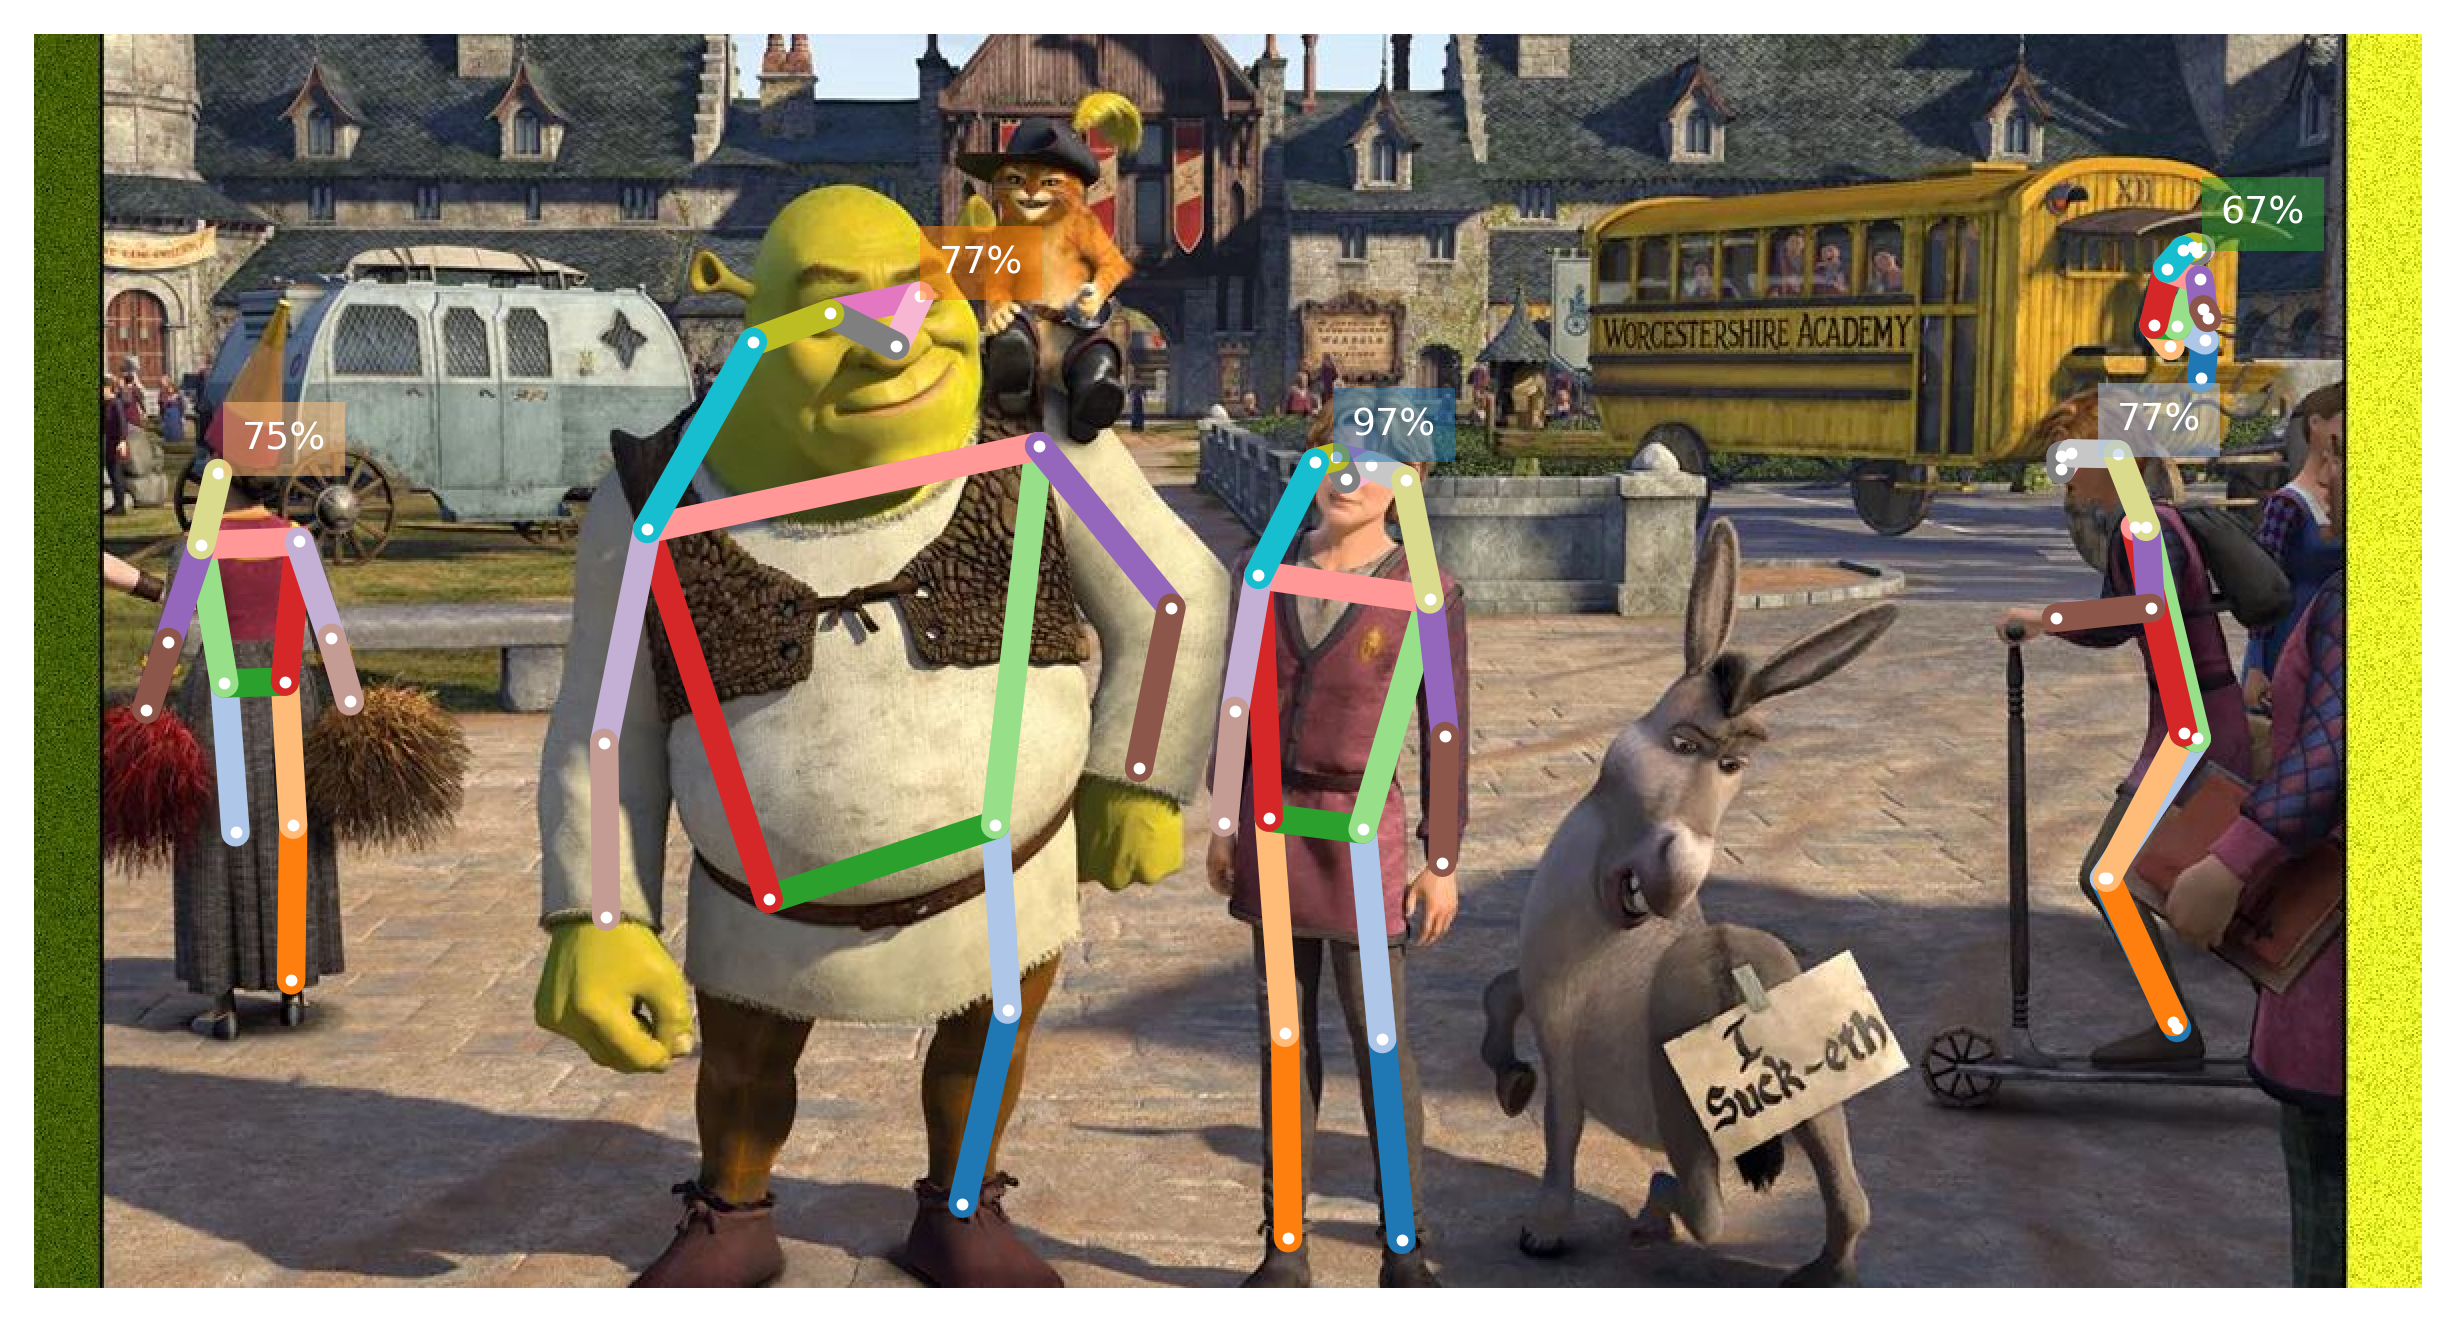

In [7]:
annotation_painter = openpifpaf.show.AnnotationPainter()
with openpifpaf.show.image_canvas(im) as ax:
    annotation_painter.annotations(ax, predictions)

# Video

`python -m openpifpaf.video --source=0 --show --horizontal-flip` for a video demo
`python3 -m openpifpafwebdemo.server` for another video demo